In [1]:
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
sample_info = pd.read_csv('../data/sample_info.csv')
radiosensitivity = pd.read_csv('../data/radiosensitivity.csv')
expression = pd.read_csv('../data/expressionData.csv')

# Label categories

## Raw SF2 Histogram

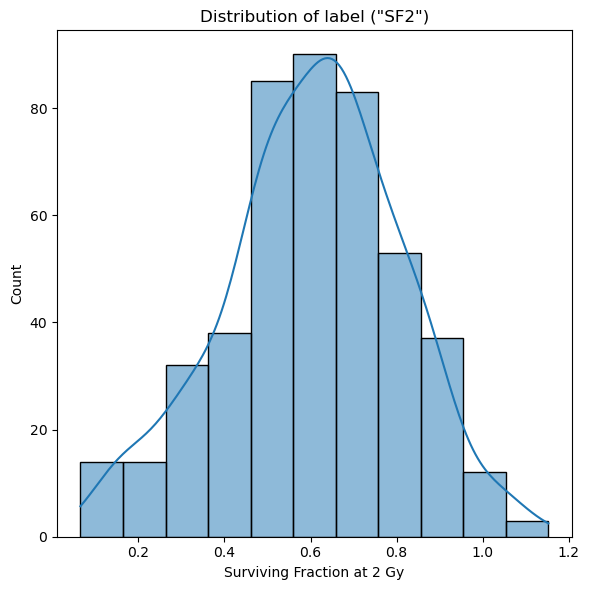

In [3]:
pvalue = sts.shapiro(radiosensitivity['SF2']).pvalue

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(x='SF2', data=radiosensitivity, ax=ax,
             kde=True, binwidth=0.1)
ax.set(title = f"Distribution of label (\"SF2\")",
       ylabel = "Count", xlabel='Surviving Fraction at 2 Gy')
plt.tight_layout()
plt.show()

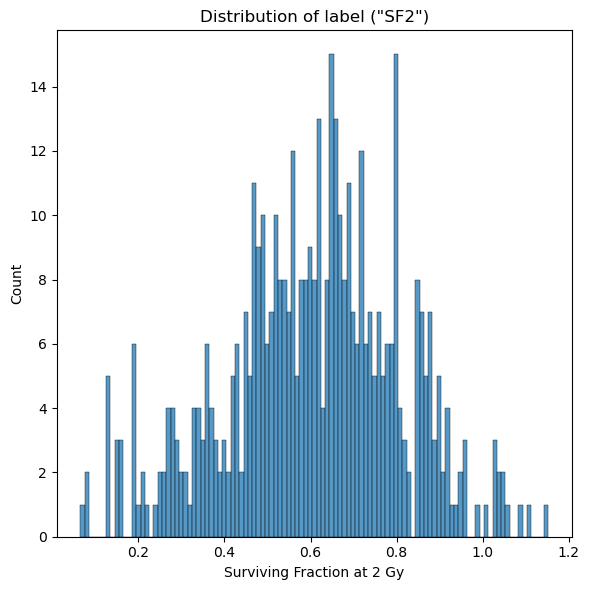

In [4]:
fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(x='SF2', data=radiosensitivity, ax=ax,
             kde=False, binwidth=0.01)
ax.set(title = f"Distribution of label (\"SF2\")",
       ylabel = "Count", xlabel='Surviving Fraction at 2 Gy')
plt.tight_layout()
plt.savefig('../output/sf2_01.pdf')
plt.show()

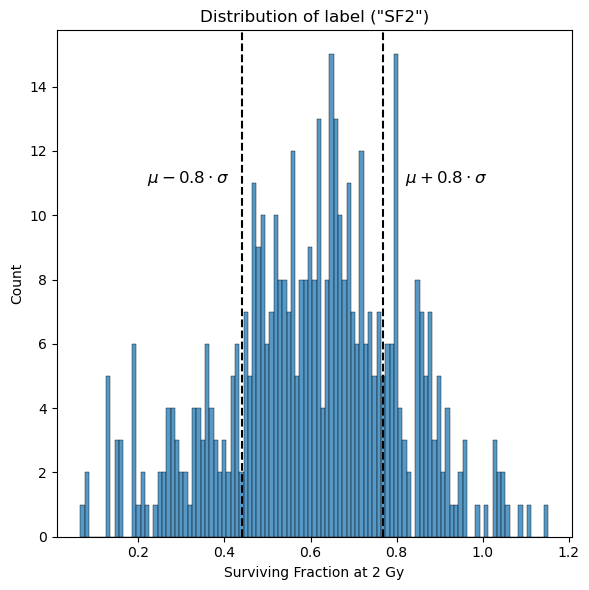

In [5]:
std_sf2 = radiosensitivity['SF2'].std()
mean_sf2 = radiosensitivity['SF2'].mean()

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(x='SF2', data=radiosensitivity, ax=ax,
             kde=False, binwidth=0.01)
ax.set(title='Distribution of label (\"SF2\")',
       xlabel = 'Surviving Fraction at 2 Gy',
       ylabel = "Count")
ax.axvline(x=mean_sf2 - std_sf2 * 0.8, ls='dashed', color='black')
ax.annotate(text="$\mu - 0.8 \cdot \sigma$", xy=(0.22, 11), size='large')
ax.axvline(x=mean_sf2 + std_sf2 * 0.8, ls='dashed', color='black')
ax.annotate(text="$\mu + 0.8 \cdot \sigma$", xy=(0.82, 11), size='large')
#ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('../output/sf2_02.pdf')
plt.show()

## Binarized SF2 Histogram

In [6]:
sc = StandardScaler()
radiosensitivity['sf2_scaled'] = sc.fit_transform(np.asarray(radiosensitivity['SF2']).reshape(-1,1))

std = radiosensitivity['sf2_scaled'].std()
mean = radiosensitivity['sf2_scaled'].mean()

for i in range(radiosensitivity.shape[0]):
    if radiosensitivity.at[i, 'sf2_scaled'] < mean - std * 0.8:
        radiosensitivity.at[i, 'Sensitivity'] = 'sensitive'
    elif radiosensitivity.at[i, 'sf2_scaled'] > mean + std * 0.8:
        radiosensitivity.at[i, 'Sensitivity'] = 'resistant'
    else:
        radiosensitivity.at[i, 'Sensitivity'] = 'intermediate'

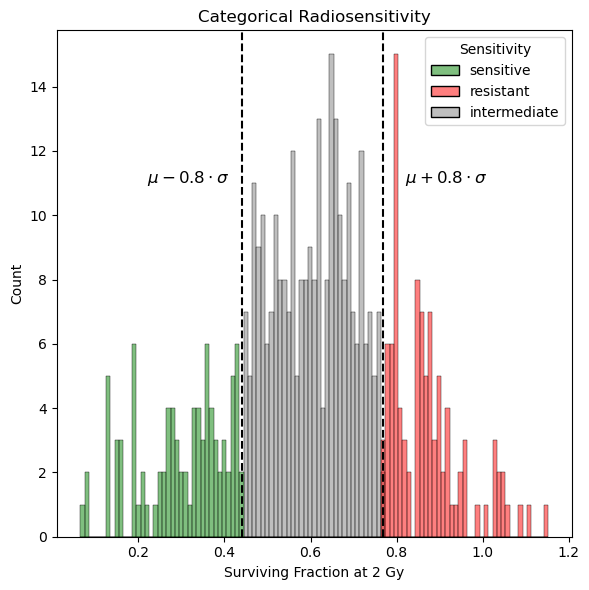

In [7]:
coloring= {'sensitive': 'g', 'intermediate': 'grey', 'resistant': 'r'}

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(x='SF2', data=radiosensitivity, ax=ax,
             kde=False, binwidth=0.01, hue='Sensitivity', palette=coloring)
ax.set(title='Categorical Radiosensitivity',
       xlabel = 'Surviving Fraction at 2 Gy',
       ylabel = "Count")
ax.axvline(x=mean_sf2 - std_sf2 * 0.8, ls='dashed', color='black')
ax.annotate(text="$\mu - 0.8 \cdot \sigma$", xy=(0.22, 11), size='large')
ax.axvline(x=mean_sf2 + std_sf2 * 0.8, ls='dashed', color='black')
ax.annotate(text="$\mu + 0.8 \cdot \sigma$", xy=(0.82, 11), size='large')
#ax.legend(frameon=False)
#ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('../output/sf2_03.pdf')
plt.show()

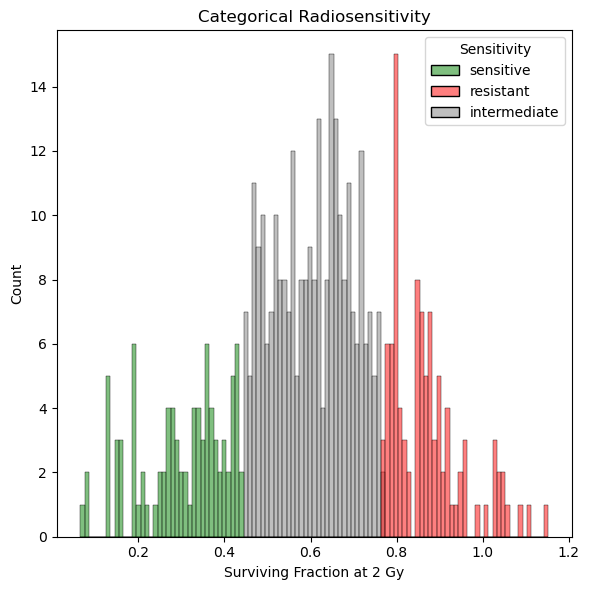

In [8]:
coloring= {'sensitive': 'g', 'intermediate': 'grey', 'resistant': 'r'}

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(x='SF2', data=radiosensitivity, ax=ax,
             kde=False, binwidth=0.01, hue='Sensitivity', palette=coloring)
ax.set(title='Categorical Radiosensitivity',
       xlabel = 'Surviving Fraction at 2 Gy',
       ylabel = "Count")
#ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('../output/sf2_04.pdf')
plt.show()

# Principal Component Analysis

In [9]:
from sklearn.decomposition import PCA

tmp = expression.drop(columns=['cell_line_name'])

pca = PCA()
data_pca = pd.DataFrame(pca.fit_transform(tmp), 
                        columns=['PCA%i' % i for i in range(1, pca.n_components_ + 1)], index=tmp.index)

In [11]:
tmp = pd.concat([radiosensitivity['Sensitivity'], data_pca], axis=1).drop(radiosensitivity[radiosensitivity.Sensitivity == 'intermediate'].index)
tmp

,Sensitivity,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA452,PCA453,PCA454,PCA455,PCA456,PCA457,PCA458,PCA459,PCA460,PCA461
0,sensitive,49.143610,44.724057,8.335947,-15.222383,-14.208606,-0.259853,-2.592312,-1.780744,-37.091833,...,-0.949589,0.519409,0.589850,0.406549,-0.117792,0.398177,0.435974,-0.582418,0.029010,4.938316e-14
1,resistant,84.276947,-25.349466,-35.431099,5.922243,7.240567,19.603225,-41.346426,9.699964,-6.281956,...,-2.285145,-0.562400,-0.334081,-0.116098,0.990446,1.117305,-0.361477,1.697621,0.514515,4.938316e-14
3,sensitive,54.331443,90.847029,41.786971,-42.424109,-11.083627,2.321817,-32.630718,-18.425658,10.367482,...,0.314477,0.005705,0.701571,-0.109773,-0.182729,-0.148617,-0.399609,-0.123412,-0.212603,4.938316e-14
7,sensitive,-23.022718,8.917795,7.422673,2.337446,-21.704531,34.678065,37.430001,-13.492432,-26.341178,...,-1.377964,0.932038,0.914032,0.720234,-0.619369,-1.669146,0.196037,-0.403995,-0.008769,4.938316e-14
8,sensitive,-17.333595,-50.850472,20.254268,-20.009584,-6.481526,-54.212411,-8.601047,-11.694512,-1.273784,...,-1.976868,3.348565,-5.848251,2.864688,-3.600130,-2.748759,1.257617,1.054750,0.701488,4.938316e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,sensitive,-0.545989,101.025285,1.758343,-13.764757,-5.826101,2.525716,-18.125293,-18.412505,55.821451,...,-0.690199,0.467438,-0.534575,-1.162672,-0.349179,0.147650,0.286796,-0.390335,-0.230443,4.938316e-14
449,sensitive,-14.206016,26.611632,-22.886924,3.032952,-19.224590,32.026801,41.429770,-17.606051,-30.963944,...,0.315776,0.364267,0.736889,-0.574102,0.155120,0.807651,0.521968,0.838528,-0.386741,4.938316e-14
458,sensitive,-29.591198,-5.371727,-6.666858,5.466433,-22.760265,-18.474061,26.604439,-2.921497,-15.129078,...,0.569870,-0.983598,-0.344146,0.406495,-0.041627,0.704178,-0.111248,-0.265158,-0.214957,4.938316e-14
459,sensitive,-72.682681,39.855849,-0.400766,61.561160,-0.190497,11.075583,-44.372860,0.918797,-8.212257,...,-0.540352,0.537213,-1.693141,-1.522816,-1.959956,-1.139833,-0.363340,0.639905,-0.057505,4.938316e-14


In [12]:
for i in range(20):
    print(f"PCA{i+1}: {pca.explained_variance_ratio_[i]:.4f}")
n=20
print(f"Cumulative explained variance by first {n} PCAs: {pca.explained_variance_ratio_[:n].sum():.4f}")

PCA1: 0.1292
PCA2: 0.0634
PCA3: 0.0408
PCA4: 0.0329
PCA5: 0.0289
PCA6: 0.0247
PCA7: 0.0212
PCA8: 0.0179
PCA9: 0.0158
PCA10: 0.0145
PCA11: 0.0130
PCA12: 0.0117
PCA13: 0.0099
PCA14: 0.0090
PCA15: 0.0088
PCA16: 0.0082
PCA17: 0.0079
PCA18: 0.0076
PCA19: 0.0072
PCA20: 0.0069
Cumulative explained variance by first 20 PCAs: 0.4795


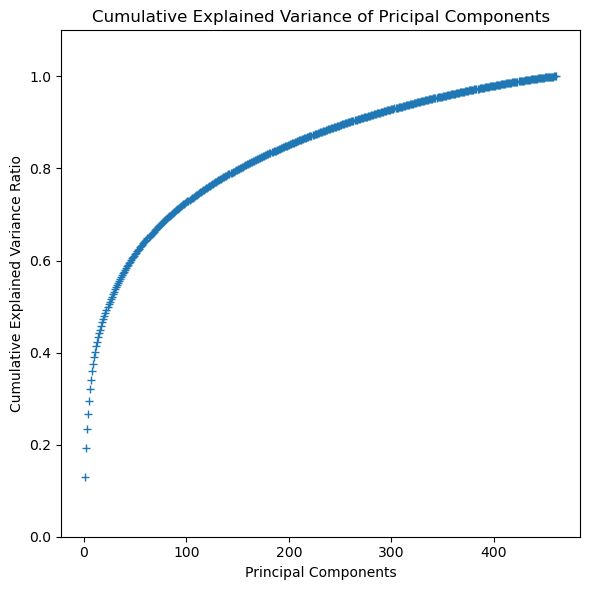

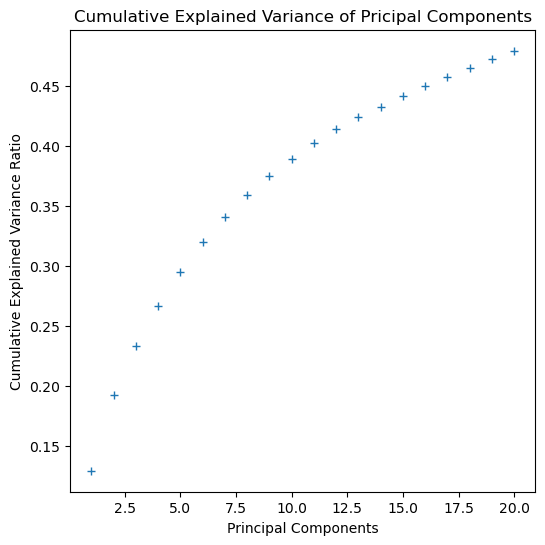

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
pca_cum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
ax.plot(
    np.arange(1, pca.n_components_ + 1), pca_cum_variance_ratio, "+", linewidth=2
)
ax.set(title='Cumulative Explained Variance of Pricipal Components',
       xlabel='Principal Components',
       ylabel="Cumulative Explained Variance Ratio",
       ylim=[0,1.1])

# ax.axvline(
#     n,
#     linestyle=":", color='red',
#     label="n_components chosen",
# )
# ax.legend(prop=dict(size=12))
plt.tight_layout()
plt.savefig('../output/pca_expression.pdf')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(
    np.arange(1, n+1), pca_cum_variance_ratio[:n], "+", linewidth=2
)
ax.set(title='Cumulative Explained Variance of Pricipal Components',
       xlabel='Principal Components',
       ylabel="Cumulative Explained Variance Ratio")
plt.show()


## Building baseline predictors

In [16]:
y_true = np.concatenate((np.zeros(100, dtype=int), (np.ones(89, dtype=int))))

In [17]:
y_pos_pred = np.ones(189, dtype=int)
y_neg_pred = np.zeros(189, dtype=int)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
def evaluation(y, y_pred):
    accuracy  = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall    = recall_score(y, y_pred)
    f1        = f1_score(y, y_pred)

    return [accuracy, precision, recall, f1]

Evaluation of a positive predictor:

In [19]:
print(evaluation(y_true, y_pos_pred))

[0.4708994708994709, 0.4708994708994709, 1.0, 0.6402877697841726]


Evaluation of a negative predictor:

In [20]:
print(evaluation(y_true, y_neg_pred))

[0.5291005291005291, 0.0, 0.0, 0.0]


/opt/homebrew/Caskroom/miniconda/base/envs/FoDS/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation of a random predictor:

In [21]:
eval = [0, 0, 0, 0]
j=0
n=10000

while j<n:
    y_rand_pred = np.random.randint(2, size=189)
    for i, metric in enumerate(evaluation(y_true, y_rand_pred)):
        eval[i] += metric
    j+=1

for i in range(len(eval)):
    eval[i] = eval[i]/n

eval

[0.500311640211639,
 0.47120168848763005,
 0.5000865168539331,
 0.48457124430290577]